In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Takeoff Configuration

In [3]:
S_to_ft = 2200 * 3.28084
M_tow = 165352.31
CL_max_to = 1.85
sigma_to = 0.92087

In [4]:
to_coeff = 37.5/(sigma_to * CL_max_to)

In [5]:
T_W_ratio = np.arange(start=0.0, stop=0.9, step=0.1)

In [6]:
W_S_CL_max_to = (S_to_ft/to_coeff) * T_W_ratio

In [7]:
1/ (S_to_ft/to_coeff)

0.0030496744583779355

In [8]:
W_S_CL_max_to

array([  0.        ,  32.79038513,  65.58077025,  98.37115538,
       131.16154051, 163.95192563, 196.74231076, 229.53269588,
       262.32308101])

Text(0, 0.5, 'Thrust to Weight ratio )T/W) [lb/lb]')

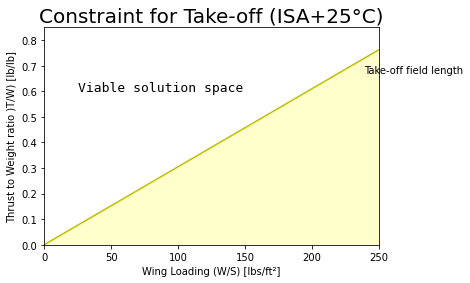

In [9]:
plt.plot(W_S_CL_max_to, T_W_ratio, 'y', label='Takeoff field length')
plt.text(239, 0.67, "Take-off field length", fontsize=10)
plt.text(25, 0.6, "Viable solution space", family="monospace", fontsize=13)
plt.xlim(0,250)
plt.ylim(0, 0.85)
plt.fill_between(W_S_CL_max_to, T_W_ratio, fc='yellow', alpha=0.2)
plt.title("Constraint for Take-off (ISA+25°C)", fontsize=20)
plt.xlabel("Wing Loading (W/S) [lbs/ft²]")
plt.ylabel("Thrust to Weight ratio )T/W) [lb/lb]")

In [10]:
# Plot for various CLs
W_S_CL_12 = (S_to_ft/(37.5/(sigma_to * 1.2))) * T_W_ratio
W_S_CL_16 = (S_to_ft/(37.5/(sigma_to * 1.6))) * T_W_ratio
W_S_CL_18 = (S_to_ft/(37.5/(sigma_to * 1.8))) * T_W_ratio
W_S_CL_20 = (S_to_ft/(37.5/(sigma_to * 2.0))) * T_W_ratio
W_S_CL_24 = (S_to_ft/(37.5/(sigma_to * 2.4))) * T_W_ratio

In [11]:
W_S_CL_24

array([  0.        ,  42.538878  ,  85.077756  , 127.616634  ,
       170.15551201, 212.69439001, 255.23326801, 297.77214601,
       340.31102401])

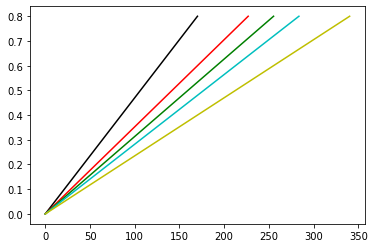

In [12]:
plt.plot(W_S_CL_12, T_W_ratio, 'k',
     W_S_CL_16, T_W_ratio, 'r',
     W_S_CL_18, T_W_ratio, 'g',
     W_S_CL_20, T_W_ratio, 'c',
     W_S_CL_24, T_W_ratio, 'y'
)
# ax.legend('Wing Loading Cl = 1.2', 'Wing Loading Cl = 1.6', 'Wing Loading Cl = 1.8', 'Wing Loading Cl = 2.0', 'Wing Loading Cl = 2.4')

## Landing Configuration

In [13]:
S_l_ft = 1500 * 3.28084
M_lw = 129112.66
sigma_l = 0.92087
rho = 0.002188
CL_max_l = 2.42

In [14]:
V_A = (S_l_ft/0.3) ** 0.5

In [15]:
V_sl = V_A / 1.3

In [16]:
V_sl_fts = V_sl * 1.68781

In [17]:
V_sl_fts

166.28678287210562

In [18]:
W_S_l = (V_sl_fts ** 2) * (rho * sigma_l * CL_max_l) / 2

In [19]:
W_S_l

67.41343783270185

In [20]:
W_S_l_CL_12 = (V_sl_fts ** 2) * (rho * sigma_l * 1.2) / 2 * (M_tow/M_lw)
W_S_l_CL_16 = (V_sl_fts ** 2) * (rho * sigma_l * 1.6) / 2 * (M_tow/M_lw)
W_S_l_CL_18 = (V_sl_fts ** 2) * (rho * sigma_l * 1.8) / 2 * (M_tow/M_lw)
W_S_l_CL_20 = (V_sl_fts ** 2) * (rho * sigma_l * 2.0) / 2 * (M_tow/M_lw)
W_S_l_CL_24 = (V_sl_fts ** 2) * (rho * sigma_l * 2.4) / 2 * (M_tow/M_lw)

In [21]:
W_S_l_CL_24

85.62168861613546

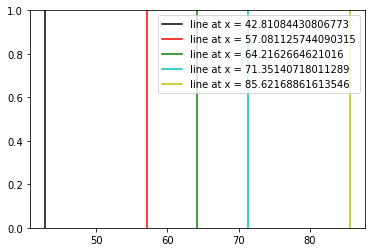

In [22]:
# x coordinates for the lines
xcoords = [W_S_l_CL_12, W_S_l_CL_16, W_S_l_CL_18, W_S_l_CL_20, W_S_l_CL_24]
# colors for the lines
colors = ['k','r','g', 'c', 'y']

for xc,c in zip(xcoords,colors):
    plt.axvline(x=xc, label='line at x = {}'.format(xc), c=c)

plt.legend()
plt.show()

In [23]:
# Wing Loading Takeoff Condition
W_S_to_l = W_S_l * (M_tow/M_lw)

In [24]:
M_tow/M_lw

1.2806823900924975

In [25]:
W_S_to_l

86.3352026879366

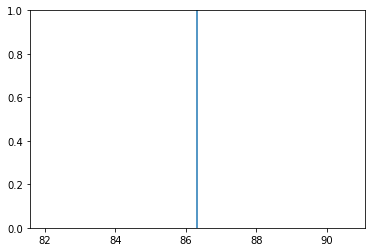

In [26]:
plt.axvline(W_S_to_l, label='Landing field length')

## Takeoff-Climb Gradient Requirements

In [27]:
CD_0_clean = 0.00825
AR = 9.5
e = 0.809
CL_max_clean = 1.25

In [28]:
K = 1/(math.pi*e*AR)

### First Segment

In [29]:
CGR_1 = 0
CD_0_1 = CD_0_clean + 0.015 + (((0.03 * 1.2) - 0.004) / (AR ** 0.33))
# CD_0_1 = CD_0 + 0.015
e_1 = e - 0.05
k_1 = 1 / (math.pi * e_1 * AR)
CL_1 = CL_max_to / (1.04 ** 2)

In [30]:
print(CD_0_1, e_1)

0.03847303299105443 0.759


In [31]:
CD_1 = CD_0_1 + (k_1 * (CL_1 ** 2))

In [32]:
CD_1

0.1676231624172731

In [33]:
L_D_1 = (CL_1 / CD_1)
L_D_1

10.204013391806676

In [34]:
T_W_1 = 2 * (CGR_1 + (1 / L_D_1))
T_W_1

0.19600131077894334

### Second Segment

In [35]:
CGR_2 = 0.024
CD_0_2 = CD_0_clean + (((0.03 * 1.2) - 0.004) / (AR ** 0.33))
e_2 = e - 0.05
k_2 = 1 / (math.pi * e_2 * AR)
CL_2 = CL_max_to / (1.13 ** 2)

In [36]:
CD_2 = CD_0_2 + (k_2 * (CL_2 ** 2))
CD_2

0.11613775538074703

In [37]:
L_D_2 = (CL_2 / CD_2)
L_D_2

12.475024676443025

In [38]:
T_W_2 = 2 * (CGR_2 + (1 / L_D_2))
T_W_2

0.20832032415748736

### Final Segment

In [39]:
CGR_3 = 0.012
CD_0_3 = CD_0_clean
e_3 = e
k_3 = 1 / (math.pi * e_3 * AR)
CL_3 = CL_max_clean / (1.18 ** 2)

In [40]:
CD_3 = CD_0_3 + (k_3 * (CL_3 ** 2))
CD_3

0.0416287444994795

In [41]:
L_D_3 = (CL_3 / CD_3)
L_D_3

21.565160035349567

In [42]:
T_W_3 = 2 * (CGR_3 + (1 / L_D_3))
T_W_3

0.11674218214572041

### Landing AEO

In [43]:
CGR_4 = 0.032
CD_0_4 = CD_0_clean + 0.015 + ((0.15 * 1.2) / (AR ** 0.33))
e_4 = e - 0.1
k_4 = 1 / (math.pi * e_4 * AR)
CL_4 = CL_max_l / (1.13 ** 2)

In [44]:
CD_4 = CD_0_4 + (k_4 * (CL_4 ** 2))
CD_4

0.2786246599591262

In [45]:
L_D_4 = (CL_4 / CD_4)
L_D_4

6.802036022377242

In [46]:
T_W_4 = (CGR_4 + (1 / L_D_4))
T_W_4

0.17901480508339182

### Landing OEI

In [47]:
CGR_5 = 0.021
CD_0_5 = CD_0_clean + 0.015 + ((0.15 * 1.2) / (AR ** 0.33))
e_5 = e - 0.1
k_5 = 1 / (math.pi * e_5 * AR)
CL_5 = CL_max_l / (1.13 ** 2)

In [48]:
CD_5 = CD_0_5 + (k_5 * (CL_5 ** 2))
CD_5

0.2786246599591262

In [49]:
L_D_5 = (CL_5 / CD_5)
L_D_5

6.802036022377242

In [50]:
T_W_5 = 2 * (CGR_5 + (1 / L_D_5))
T_W_5

0.3360296101667836

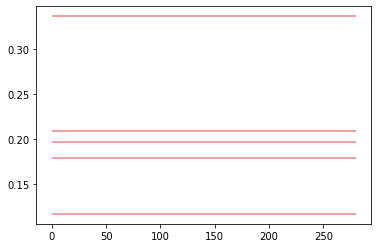

In [51]:
plt.hlines(T_W_1, 0, 280, colors='lightcoral', label='First Segment CGR')
plt.hlines(T_W_2, 0, 280, colors='lightcoral', label='First Segment CGR')
plt.hlines(T_W_3, 0, 280, colors='lightcoral', label='First Segment CGR')
plt.hlines(T_W_4, 0, 280, colors='lightcoral', label='First Segment CGR')
plt.hlines(T_W_5, 0, 280, colors='lightcoral', label='First Segment CGR')

## Rate of Climb

In [52]:
R_C = 300
tau = 0.218968565
M_cruisew = 160166.87
q = 172.8810082
W_S_cr = 52.63728618
S = 3042.840486 #WINGLD sheet
V_cr = 761.5776

In [53]:
M_cruisew / M_tow

0.9686400510522049

In [54]:
CL_RC = M_cruisew/(q * S)

In [55]:
CD_RC = CD_0_clean + K * (CL_RC ** 2)

In [56]:
CL_RC / CD_RC

25.184841548902497

In [57]:
T_W_h = (300/V_cr) + (CD_RC/CL_RC)
T_W_h

0.4336255730050825

In [58]:
T_W_cr = ((q * CD_0_clean) / W_S_cr) + ((K / q) * W_S_cr)

In [59]:
R_C_coeff = T_W_cr * W_S_cr * (1 / tau)

In [60]:
W_S_rc = np.arange(start=15, stop=280, step=0.1)

In [61]:
T_W_rc = (R_C_coeff/W_S_rc) * (5/4)
T_W_rc

array([0.79541038, 0.79014276, 0.78494445, ..., 0.04265697, 0.04264173,
       0.04262649])

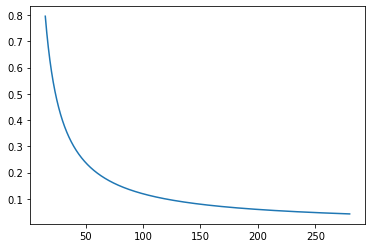

In [63]:
plt.plot(W_S_rc, T_W_rc)
# plt.hlines(T_W_h, 0, 280)

# Combine for C-Diagram

Text(25, 0.6, 'Viable solution space')

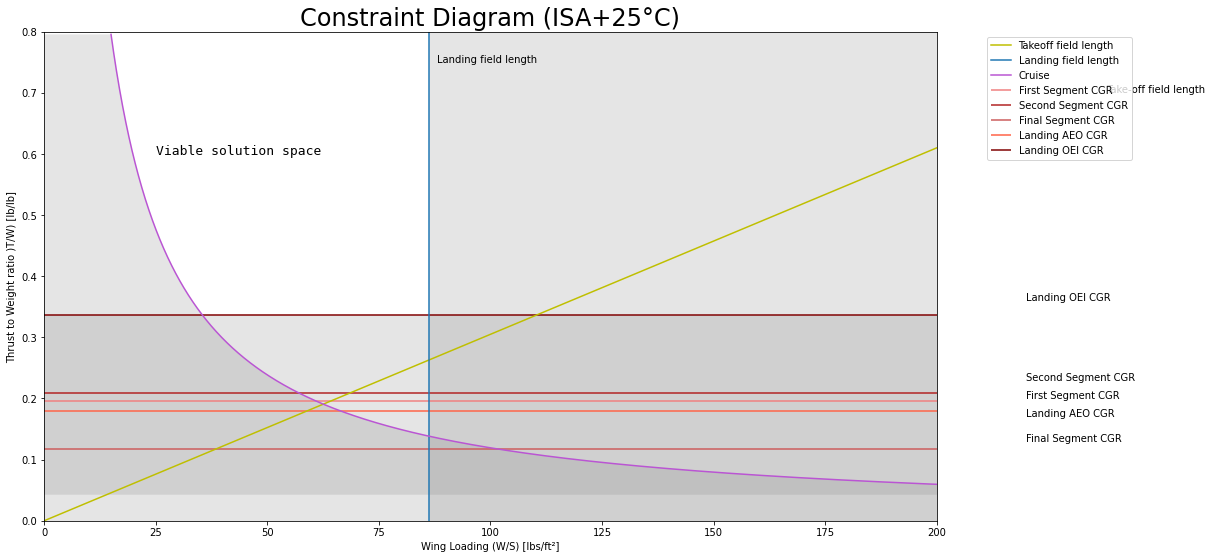

In [66]:
plt.figure(figsize=(16,9))

# Takeoff field length
plt.plot(W_S_CL_max_to, T_W_ratio, 'y', label='Takeoff field length')
plt.text(238, 0.7, "Take-off field length", fontsize=10)
# plt.fill_betweenx(T_W_ratio, W_S_CL_24, fc='yellow', alpha=0.2)

# Landing field length
plt.axvline(W_S_to_l, 0, 1, label='Landing field length')
plt.text(88, 0.75, "Landing field length", fontsize=10)
# plt.fill_betweenx(T_W_ratio, W_S_l_CL_24, fc='aqua', alpha=0.2)

# Takeoff Climb Gradient
## First Segment
plt.hlines(T_W_1, 0, 280, colors='lightcoral', label='First Segment CGR')
plt.text(220, 0.20, "First Segment CGR", fontsize=10)
# plt.fill_between(W_S_CL_24, T_W_1, 0.75, fc='lightcoral', alpha=0.2)
## Second Segment
plt.hlines(T_W_2, 0, 280, colors='firebrick', label='Second Segment CGR')
plt.text(220, 0.23, "Second Segment CGR", fontsize=10)
# plt.fill_between(W_S_CL_24, T_W_2, 0.75, fc='firebrick', alpha=0.2)
## Final Segment
plt.hlines(T_W_3, 0, 280, colors='indianred', label='Final Segment CGR')
plt.text(220, 0.13, "Final Segment CGR", fontsize=10)
# plt.fill_between(W_S_CL_24, T_W_3, 0.75, fc='indianred', alpha=0.2)
## Landing AEO
plt.hlines(T_W_4, 0, 280, colors='tomato', label='Landing AEO CGR')
plt.text(220, 0.17, "Landing AEO CGR", fontsize=10)
# plt.fill_between(W_S_CL_24, T_W_4, 0.75, fc='tomato', alpha=0.2)
## Landing OEI
plt.hlines(T_W_5, 0, 280, colors='maroon', label='Landing OEI CGR')
plt.text(220, 0.36, "Landing OEI CGR", fontsize=10)
# plt.fill_between(W_S_CL_24, T_W_5, 0.75, fc='maroon', alpha=0.2)

# Rate of Climb
# plt.hlines(T_W_h, 0, 280, colors='indigo', label = 'Rate of Climb')
# plt.text(220, 0.445, "Rate of Climb", fontsize=10)
plt.plot(W_S_rc, T_W_rc, 'mediumorchid', label='Cruise')
# plt.fill_betweenx(T_W_rc, W_S_rc, 280, fc='darkorchid', alpha=0.2)

plt.fill_betweenx(T_W_ratio, W_S_to_l, 280, fc='grey', alpha=0.2)
plt.fill_between(W_S_CL_max_to, T_W_5, fc='grey', alpha=0.2)
plt.fill_betweenx(T_W_rc, W_S_rc, fc='grey', alpha=0.2)
plt.title("Constraint Diagram (ISA+25°C)", fontsize=24)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim(0, 200)
plt.ylim(0, 0.8)
plt.xlabel("Wing Loading (W/S) [lbs/ft²]")
plt.ylabel("Thrust to Weight ratio )T/W) [lb/lb]")
plt.text(25, 0.6, "Viable solution space", family="monospace", fontsize=13)

Text(28, 0.6, 'Viable solution space')

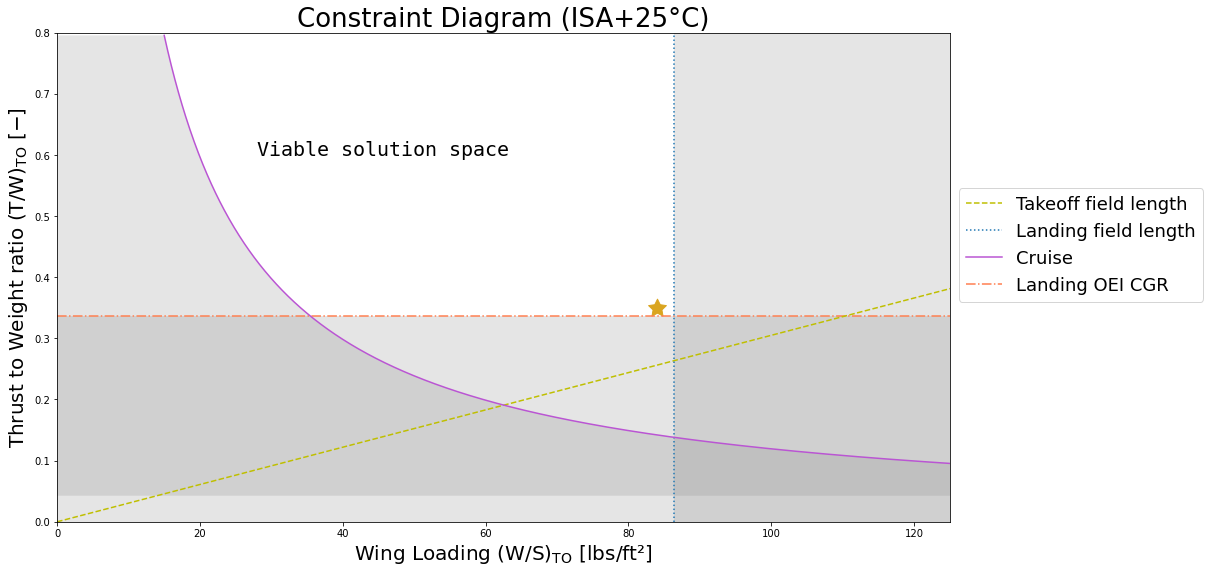

In [130]:
plt.figure(figsize=(16,9))

# Takeoff field length
plt.plot(W_S_CL_max_to, T_W_ratio, 'y', linestyle='dashed', label='Takeoff field length')
# plt.text(155, 0.57, "Take-off field length", fontsize=14)
# plt.fill_betweenx(T_W_ratio, W_S_CL_24, fc='yellow', alpha=0.2)

# Landing field length
plt.axvline(W_S_to_l, 0, 1, linestyle=':', label='Landing field length')
# plt.text(87, 0.75, "Landing field length", fontsize=14)
# plt.fill_betweenx(T_W_ratio, W_S_l_CL_24, fc='aqua', alpha=0.2)

# Takeoff Climb Gradient
# ## First Segment
# plt.hlines(T_W_1, 0, 280, colors='lightcoral', linestyle='-.', label='First Segment CGR')
# # plt.text(201, 0.19, "First Segment CGR", fontsize=14)
# # plt.fill_between(W_S_CL_24, T_W_1, 0.75, fc='lightcoral', alpha=0.2)
# ## Second Segment
# plt.hlines(T_W_2, 0, 280, colors='firebrick', linestyle='-.', label='Second Segment CGR')
# # plt.text(201, 0.21, "Second Segment CGR", fontsize=14)
# # plt.fill_between(W_S_CL_24, T_W_2, 0.75, fc='firebrick', alpha=0.2)
# ## Final Segment
# plt.hlines(T_W_3, 0, 280, colors='indianred', linestyle='-.', label='Final Segment CGR')
# # plt.text(201, 0.11, "Final Segment CGR", fontsize=14)
# # plt.fill_between(W_S_CL_24, T_W_3, 0.75, fc='indianred', alpha=0.2)
# ## Landing AEO
# plt.hlines(T_W_4, 0, 280, colors='tomato', linestyle='-.', label='Landing AEO CGR')
# # plt.text(201, 0.17, "Landing AEO CGR", fontsize=14)
# plt.fill_between(W_S_CL_24, T_W_4, 0.75, fc='tomato', alpha=0.2)
## Landing OEI
plt.hlines(T_W_5, 0, 280, colors='coral', linestyle='-.', label='Landing OEI CGR')
# plt.text(201, 0.33, "Landing OEI CGR", fontsize=14)
# plt.fill_between(W_S_CL_24, T_W_5, 0.75, fc='maroon', alpha=0.2)

# Rate of Climb
# plt.hlines(T_W_h, 0, 280, colors='indigo', label = 'Rate of Climb')
# plt.text(220, 0.445, "Rate of Climb", fontsize=10)
plt.plot(W_S_rc, T_W_rc, 'mediumorchid', label='Cruise')
# plt.fill_betweenx(T_W_rc, W_S_rc, 280, fc='darkorchid', alpha=0.2)

# Design Point
plt.scatter(84, 0.35, s=350, color='goldenRod',marker=(5, 1))


plt.fill_betweenx(T_W_ratio, W_S_to_l, 280, fc='grey', alpha=0.2)
plt.fill_between(W_S_CL_max_to, T_W_5, fc='grey', alpha=0.2)
plt.fill_betweenx(T_W_rc, W_S_rc, fc='grey', alpha=0.2)
plt.title("Constraint Diagram (ISA+25°C)", fontsize=26)
plt.legend(bbox_to_anchor=(1, 0.7), loc='upper left', prop={'size':18})
plt.xlim(0, 125)
plt.ylim(0, 0.8)
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)
plt.xlabel("$Wing\ Loading\ (W/S)_{TO}\ [lbs/ft²]$", fontsize=20)
plt.ylabel("$Thrust\ to\ Weight\ ratio\ (T/W)_{TO}\ [-]$", fontsize=20)
plt.text(28, 0.6, "Viable solution space", family="monospace", fontsize=20)